In [ ]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
import os, shutil

In [ ]:
# The directory where we will
# store our smaller dataset
base_dir = '/content/drive/My Drive/Colab Notebooks/Data/cats_dogs_small'


In [ ]:
base_dir

'/content/drive/My Drive/Colab Notebooks/Data/cats_dogs_small'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


In [ ]:
train_dir

'/content/drive/My Drive/Colab Notebooks/Data/cats_dogs_small/train'

In [ ]:
# Directories for our training,
# validation and test splits

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [ ]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total validation cat images: 500
total test cat images: 501
total test dog images: 510


In [ ]:
from PIL import Image


In [ ]:
im = Image.open('/content/drive/MyDrive/Colab Notebooks/Data/cats_dogs_small/train/cats/cat.170.jpg')
width, height = im.size

In [ ]:
print(width, height)

322 499


In [ ]:
# used this alternative to show image
import matplotlib.pyplot as plt
plt.imshow(im)

In [ ]:
# another alternative
from keras.preprocessing.image import load_img
img = load_img('/content/drive/MyDrive/Colab Notebooks/Data/cats_dogs_small/train/cats/cat.455.jpg')
import matplotlib.pyplot as plt
plt.imshow(img)


In [ ]:
width, height = img.size
print (width, height)

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3))) 
# 1st layer - 32 kernel, each kernel (3x3), rest of the settings are default- no padding, stride =1
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()
# check output size for each step

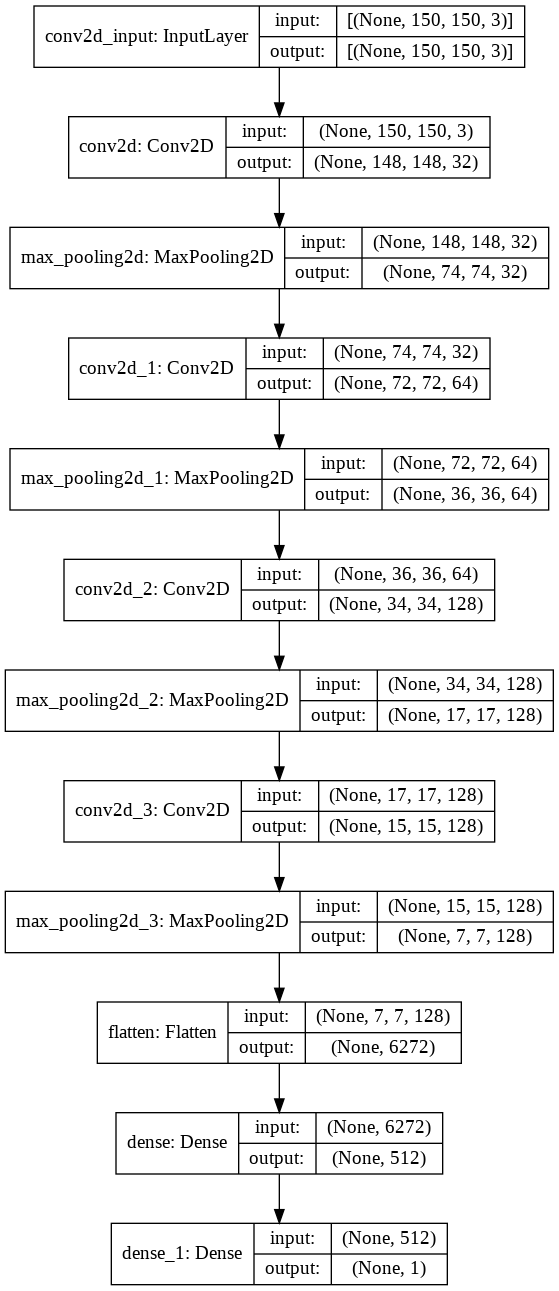

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

From Documentation:

ImageDataGenerator - tf.keras.preprocessing.image_dataset_from_directory
Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories class_a and class_b, together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).

Supported image formats: jpeg, png, bmp, gif. Animated gifs are truncated to the first frame.

In [ ]:
# original code
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

In [ ]:
# alternate code - With original image size
keras.preprocessing.image_dataset_from_directory (
        # This is the target directory
        train_dir,
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        )
keras.preprocessing.image_dataset_from_directory (
        # This is the target directory
        validation_dir,
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        )


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In [ ]:
batch_size =20

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch= len(os.listdir(train_cats_dir))//batch_size,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=len(os.listdir(validation_cats_dir))//batch_size)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Saved model/JUL21-Cats-Dogs-Small.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()